In [1]:
import numpy as np
import mpmath
from mpmath import *
import matplotlib.pyplot as plt 


d=14
mp.dps = d

x0=0.36
r=4

n_new=412 #número de pontos novos a serem previstos

for i in range(200): #eliminar o transiente
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    
    
lenght=100 #tamanho da série temporal

x_timeser=matrix(lenght+n_new, 1)

for i in range(lenght+n_new):
    x1=x0*mpf(r*(mpf((1-x0))))
    x1=mpf(x1)
    x0=x1
    x_timeser[i,0]=x1
    
print(x_timeser)

x_timeser_r=x_timeser.copy() #cópia da série original que nunca será modificada
x_timeser_o=x_timeser.copy() #cópia da série, no final serão adicionados os novos pontos reconstrúidos pelo método

t=np.arange(0,lenght,1)

plt.plot(t,np.asarray(x_timeser.tolist())[:lenght],'b')
plt.title('time series')
plt.show()


[   0.67578940874849]
[   0.87639233508743]
[   0.43331524034973]
[   0.98221257132154]
[  0.069884144237872]
[   0.26000140248805]
[   0.76960269276918]
[   0.70925755220642]
[   0.82484510737831]
[    0.5779026248495]
[   0.97572472416624]
[  0.094743947267838]
[   0.34307012689579]
[   0.90149205970999]
[   0.35521650395933]
[   0.91615095709697]
[   0.30727352362911]
[   0.85142602122264]
[    0.5059990064305]
[   0.99985604768739]
[0.00057572636137964]
[ 0.0023015796021458]
[ 0.0091851293339231]
[  0.036403050932169]
[      0.14031147526]
[   0.48249666068144]
[    0.9987745324508]
[ 0.0048958631139614]
[  0.019487574553323]
[  0.076431235965406]
[   0.28235800853683]
[   0.81052785420778]
[   0.61428980704446]
[   0.94775136002296]
[   0.19807487839035]
[   0.63536488376398]
[   0.92670539297426]
[   0.27169003042674]
[   0.79149823117383]
[    0.6601151248901]
[   0.89745258712571]
[   0.36812576394833]
[   0.93043674346315]
[   0.25889683950734]
[    0.7674770640018]
[   0.7138

In [2]:
def lyapunov(x0,r): #função que calcula lyapunov
    
    for i in range(200): 
        x1=x0*mpf(r*(mpf(1-x0)))
        x1=mpf(x1)
        x0=x1
    
    lyp=0
    for i in range(10000):
        x1=x0*mpf(r*(mpf(1-x0)))
        x1=mpf(x1)
        x0=x1
        aux=mpf(r-mpf(2*mpf(r*x1)))
        #print(aux)
        aux=mpmath.log(abs(aux))
        #print(aux)
        lyp=lyp+aux
        lyp+mpf(lyp)
    lyp=mpf(lyp/100000)
    
    return lyp

In [3]:
def distanc(v1,v2):
    return mpmath.norm(v2-v1,2)
        

[   0.67578940874849]
[   0.87639233508743]
[   0.43331524034973]
[   0.98221257132154]
[  0.069884144237872]
[   0.26000140248805]
[   0.76960269276918]
[   0.70925755220642]
[   0.82484510737831]
[    0.5779026248495]
[   0.97572472416624]
[  0.094743947267838]
[   0.34307012689579]
[   0.90149205970999]
[   0.35521650395933]
[   0.91615095709697]
[   0.30727352362911]
[   0.85142602122264]
[    0.5059990064305]
[   0.99985604768739]
[0.00057572636137964]
[ 0.0023015796021458]
[ 0.0091851293339231]
[  0.036403050932169]
[      0.14031147526]
[   0.48249666068144]
[    0.9987745324508]
[ 0.0048958631139614]
[  0.019487574553323]
[  0.076431235965406]
[   0.28235800853683]
[   0.81052785420778]
[   0.61428980704446]
[   0.94775136002296]
[   0.19807487839035]
[   0.63536488376398]
[   0.92670539297426]
[   0.27169003042674]
[   0.79149823117383]
[    0.6601151248901]
[   0.89745258712571]
[   0.36812576394833]
[   0.93043674346315]
[   0.25889683950734]
[    0.7674770640018]
[   0.7138

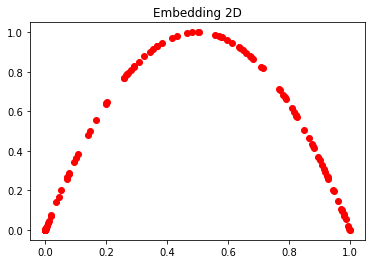

In [4]:
D=2

coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    for j in range (D):
        coor_emb[i,j]=x_timeser[i+j,0] #pegando as coordenadas no espaço de dimensão D

print(x_timeser,coor_emb)

plt.plot(coor_emb[:,0],coor_emb[:,1],'ro')
plt.title('Embedding 2D')
plt.show()




0 0.67578940874849 0.87639233508743
1 0.87639233508743 0.43331524034973
2 0.43331524034973 0.98221257132154
3 0.98221257132154 0.069884144237872
4 0.069884144237872 0.26000140248805
5 0.26000140248805 0.76960269276918
6 0.76960269276918 0.70925755220642
7 0.70925755220642 0.82484510737831
8 0.82484510737831 0.5779026248495
9 0.5779026248495 0.97572472416624
10 0.97572472416624 0.094743947267838
11 0.094743947267838 0.34307012689579
12 0.34307012689579 0.90149205970999
13 0.90149205970999 0.35521650395933
14 0.35521650395933 0.91615095709697
15 0.91615095709697 0.30727352362911
16 0.30727352362911 0.85142602122264
17 0.85142602122264 0.5059990064305
18 0.5059990064305 0.99985604768739
19 0.99985604768739 0.00057572636137964
20 0.00057572636137964 0.0023015796021458
21 0.0023015796021458 0.0091851293339231
22 0.0091851293339231 0.036403050932169
23 0.036403050932169 0.14031147526
24 0.14031147526 0.48249666068144
25 0.48249666068144 0.9987745324508
26 0.9987745324508 0.0048958631139614
2

lyap 0.069322137267547 1.0492235810212
dist 0.006147403331853
b -0.15286247193081 c 0.0058377957481494
delta 0.0039689207854273
new value 0.07841569635812
new coor 117 0.025305863363121 0.07841569635812
0.025305863363121 0.07841569635812
indmin 28 dist0 0.0061474033318525
lyap 0.069322137267547 1.0492235810212
dist 0.0064500005378276
b -0.56471601707365 c 0.079688380560995
delta 0.012274269654485
new value 0.28849514336407
new coor 118 0.07841569635812 0.28849514336407
0.07841569635812 0.28849514336407
indmin 69 dist0 0.0015908417751013
lyap 0.069322137267547 1.0492235810212
dist 0.0016691487041099
b -1.6473966917607 c 0.67847862318073
delta 0.0011693165397202
new value 0.82428300415021
new coor 119 0.28849514336407 0.82428300415021
0.28849514336407 0.82428300415021
indmin 70 dist0 0.0016691487042082
lyap 0.069322137267547 1.0492235810212
dist 0.0017513101806861
b -1.1617550469946 c 0.3374159720423
delta 0.0033016735492588
new value 0.58252836027193
new coor 120 0.82428300415021 0.5825

lyap 0.069322137267547 1.0492235810212
dist 0.0020694526696315
b -1.9598385893278 c 0.96024006401591
delta 0.0026533289709641
new value 0.98124595914937
new coor 148 0.57244147085149 0.98124595914937
0.57244147085149 0.98124595914937
indmin 67 dist0 0.002069452669571
lyap 0.069322137267547 1.0492235810212
dist 0.0021713185407211
b -0.15741976487453 c 0.00619229100774
delta 0.0034377815801713
new value 0.080428773227352
new coor 149 0.98124595914937 0.080428773227352
0.98124595914937 0.080428773227352
indmin 68 dist0 0.0021713185407216
lyap 0.069322137267547 1.0492235810212
dist 0.0022781986148336
b -0.58011709475182 c 0.084131725302443
delta 0.0029903868515082
new value 0.29155374080167
new coor 150 0.080428773227352 0.29155374080167
0.080428773227352 0.29155374080167
indmin 69 dist0 0.00227819861484
lyap 0.069322137267547 1.0492235810212
dist 0.0023903397089399
b -1.6473966917607 c 0.67847548688548
delta 0.0037299439907732
new value 0.82556331787574
new coor 151 0.29155374080167 0.825

lyap 0.069322137267547 1.0492235810212
dist 0.001108964885301
b -1.0049559351539 c 0.25248354508374
delta 0.0015004219602851
new value 0.50322817855708
new coor 179 0.14908397232034 0.50322817855708
0.14908397232034 0.50322817855708
indmin 131 dist0 0.0011089648853064
lyap 0.069322137267547 1.0492235810212
dist 0.0011635521081879
b -2.0026287737698 c 1.0026297103457
delta 0.0017788052103926
new value 1.0022037894901
new coor 180 0.50322817855708 1.0022037894901
0.50322817855708 1.0022037894901
indmin 132 dist0 0.0011635521083546
lyap 0.069322137267547 1.0492235810212
dist 0.0012208263098326
b -0.0020225917870523 c 3.233394996133e-7
delta 0.0016725787092386
new value 0.0018475852481455
new coor 181 1.0022037894901 0.0018475852481455
1.0022037894901 0.0018475852481455
indmin 133 dist0 0.0012208263098326
lyap 0.069322137267547 1.0492235810212
dist 0.0012809197526073
b -0.0076758884377542 c 1.3788440299242e-5
delta 0.0019404901730956
new value 0.0048081893054249
new coor 182 0.001847585248

lyap 0.069322137267547 1.0492235810212
dist 0.00019986215168049
b -1.9656210511686 c 0.96591651244709
delta 0.00025886083812172
new value 0.98293995600338
new coor 210 0.57297278861097 0.98293995600338
0.57297278861097 0.98293995600338
indmin 157 dist0 0.00019986215100442
lyap 0.069322137267547 1.0492235810212
dist 0.00020970008178744
b -0.16405300933022 c 0.0067283202456847
delta 0.00032998115656485
new value 0.082191495243394
new coor 211 0.98293995600338 0.082191495243394
0.98293995600338 0.082191495243394
indmin 158 dist0 0.00020970008178395
lyap 0.069322137267547 1.0492235810212
dist 0.00022002227074979
b -0.58655142453132 c 0.086010622217021
delta 0.00029112133999279
new value 0.29342127293566
new coor 212 0.082191495243394 0.29342127293566
0.082191495243394 0.29342127293566
indmin 159 dist0 0.00022002227062688
lyap 0.069322137267547 1.0492235810212
dist 0.00023085255469153
b -1.6546606479574 c 0.68447543286971
delta 0.00035835732631275
new value 0.82750950264186
new coor 213 0.2

lyap 0.069322137267547 1.0492235810212
dist 0.00084483488042288
b -0.11087120794168 c 0.0030727363590567
delta 0.0012162706200584
new value 0.056043739280871
new coor 240 0.98907416231722 0.056043739280871
0.98907416231722 0.056043739280871
indmin 187 dist0 0.0008448348804233
lyap 0.069322137267547 1.0492235810212
dist 0.00088642067860931
b -0.40503258182689 c 0.041012432172275
delta 0.0012898264444664
new value 0.20316120413568
new coor 241 0.056043739280871 0.20316120413568
0.056043739280871 0.20316120413568
indmin 188 dist0 0.00088642067863716
lyap 0.069322137267547 1.0492235810212
dist 0.00093005347873088
b -1.2872888657969 c 0.41427770691474
delta 0.0013402781934345
new value 0.64431457199515
new coor 242 0.20316120413568 0.64431457199515
0.20316120413568 0.64431457199515
indmin 189 dist0 0.00093005347865638
lyap 0.069322137267547 1.0492235810212
dist 0.00097583404141702
b -1.8460554716242 c 0.85197969791274
delta 0.0014186834281879
new value 0.92373707752619
new coor 243 0.644314

lyap 0.069322137267547 1.0492235810212
dist 5.6944538684911e-5
b -1.1450969692137 c 0.32781176465952
delta 0.00010131300262781
new value 0.57259914110817
new coor 271 0.82879122041597 0.57259914110817
0.82879122041597 0.57259914110817
indmin 198 dist0 5.6944537459129e-5
lyap 0.069322137267547 1.0492235810212
dist 5.9747551512461e-5
b -1.9626156477504 c 0.96296504419495
delta 6.3362120415775e-5
new value 0.98133950493539
new coor 272 0.57259914110817 0.98133950493539
0.57259914110817 0.98133950493539
indmin 199 dist0 5.9747558119553e-5
lyap 0.069322137267547 1.0492235810212
dist 6.2688546887467e-5
b -0.16108552151847 c 0.0064871333845551
delta 0.00010818806462219
new value 0.080596854791547
new coor 273 0.98133950493539 0.080596854791547
0.98133950493539 0.080596854791547
indmin 200 dist0 6.2688546861283e-5
lyap 0.069322137267547 1.0492235810212
dist 6.5774301626808e-5
b -0.58325612776468 c 0.085046926243668
delta 7.4835672905202e-5
new value 0.29166548171879
new coor 274 0.080596854791

lyap 0.069322137267547 1.0492235810212
dist 0.00025255817189659
b -0.29891328036307 c 0.022337254737147
delta 0.00036087230929208
new value 0.14963707633618
new coor 302 0.96369332632376 0.14963707633618
0.96369332632376 0.14963707633618
indmin 229 dist0 0.00025255817190185
lyap 0.069322137267547 1.0492235810212
dist 0.00026498998953901
b -1.0072605216963 c 0.25364340197951
delta 0.00038813651558857
new value 0.50382432910597
new coor 303 0.14963707633618 0.50382432910597
0.14963707633618 0.50382432910597
indmin 230 dist0 0.00026498998959745
lyap 0.069322137267547 1.0492235810212
dist 0.0002780337458202
b -2.0052302526735 c 1.0052370519189
delta 0.00039819731321256
new value 1.0028142249933
new coor 304 0.50382432910597 1.0028142249933
0.50382432910597 1.0028142249933
indmin 231 dist0 0.00027803374569648
lyap 0.069322137267547 1.0492235810212
dist 0.00029171956230439
b -0.0045784482143902 c 5.1950869849948e-6
delta 0.00042642714720553
new value 0.0025024376807979
new coor 305 1.0028142

lyap 0.069322137267547 1.0492235810212
dist 0.00023354252905441
b -1.6527436061919 c 0.68289031351225
delta 0.00041684439608027
new value 0.82658022529399
new coor 332 0.29264213809182 0.82658022529399
0.29264213809182 0.82658022529399
indmin 279 dist0 0.00015681925139407
lyap 0.069322137267547 1.0492235810212
dist 0.00016453845652074
b -1.146091304825 c 0.32838131582087
delta 0.00012534780979381
new value 0.57310832631742
new coor 333 0.82658022529399 0.57310832631742
0.82658022529399 0.57310832631742
indmin 280 dist0 0.00016453845580097
lyap 0.069322137267547 1.0492235810212
dist 0.00017263762781118
b -1.9660067730966 c 0.96629563208972
delta 0.00032171870806329
new value 0.98316424590234
new coor 334 0.57310832631742 0.98316424590234
0.57310832631742 0.98316424590234
indmin 281 dist0 0.00017263762664761
lyap 0.069322137267547 1.0492235810212
dist 0.00018113546885019
b -0.16454111083105 c 0.0067684373540526
delta 0.00016654520459897
new value 0.082353828017824
new coor 335 0.98316424

lyap 0.069322137267547 1.0492235810212
dist 0.00066288875479105
b -1.1221140993782 c 0.31478477248763
delta 0.00098085309178186
new value 0.56154747623498
new coor 362 0.17042179216563 0.56154747623498
0.17042179216563 0.56154747623498
indmin 309 dist0 0.00066288875486399
lyap 0.069322137267547 1.0492235810212
dist 0.00069551851319704
b -1.9787148651307 c 0.97882788614445
delta 0.00098636262096242
new value 0.98985061387581
new coor 363 0.56154747623498 0.98985061387581
0.56154747623498 0.98985061387581
indmin 310 dist0 0.00069551851299761
lyap 0.069322137267547 1.0492235810212
dist 0.00072975442487386
b -0.11267574660923 c 0.0031736666547711
delta 0.0010757578084616
new value 0.056875752208844
new coor 364 0.98985061387581 0.056875752208844
0.98985061387581 0.056875752208844
indmin 311 dist0 0.0007297544248747
lyap 0.069322137267547 1.0492235810212
dist 0.00076567555093306
b -0.4069455063958 c 0.0414008643486
delta 0.0010898538135199
new value 0.20401768010466
new coor 365 0.056875752

lyap 0.069322137267547 1.0492235810212
dist 2.3703145253488e-5
b -0.16454111083105 c 0.0067684437909585
delta 4.4605847306289e-5
new value 0.082292858339177
new coor 392 0.98301141267394 0.082292858339177
0.98301141267394 0.082292858339177
indmin 282 dist0 2.3703145278117e-5
lyap 0.069322137267547 1.0492235810212
dist 2.486989897017e-5
b -0.58698480996601 c 0.086137791661616
delta 2.2008313900374e-5
new value 0.29350340913995
new coor 393 0.082292858339177 0.29350340913995
0.082292858339177 0.29350340913995
indmin 283 dist0 2.4869898947517e-5
lyap 0.069322137267547 1.0492235810212
dist 2.6094084433348e-5
b -1.6551909515538 c 0.68491427096661
delta 4.7320607610334e-5
new value 0.82761913608072
new coor 394 0.29350340913995 0.82761913608072
0.29350340913995 0.82761913608072
indmin 284 dist0 2.6094088340672e-5
lyap 0.069322137267547 1.0492235810212
dist 2.7378532812282e-5
b -1.144112795044 c 0.32724852175605
delta 2.7551694997793e-5
new value 0.57207017336947
new coor 395 0.82761913608072

lyap 0.069322137267547 1.0492235810212
dist 0.00010512717446792
b -1.2892773178043 c 0.41555899496299
delta 0.00014950806054276
new value 0.64471341293242
new coor 423 0.20354666907986 0.64471341293242
0.20354666907986 0.64471341293242
indmin 313 dist0 0.00010512717369065
lyap 0.069322137267547 1.0492235810212
dist 0.00011030190964234
b -1.8481595693215 c 0.85392344184029
delta 0.00016221400516646
new value 0.92416089166332
new coor 424 0.64471341293242 0.92416089166332
0.64471341293242 0.92416089166332
indmin 314 dist0 0.00011030190800677
lyap 0.069322137267547 1.0492235810212
dist 0.00011573136291232
b -0.59291150344889 c 0.087886005915104
delta 0.00016511090169472
new value 0.29653830717529
new coor 425 0.92416089166332 0.29653830717529
0.92416089166332 0.29653830717529
indmin 315 dist0 0.00011573136278771
lyap 0.069322137267547 1.0492235810212
dist 0.00012142807490057
b -1.6628403588556 c 0.69125950683041
delta 0.00017809407053965
new value 0.83150922646309
new coor 426 0.296538307

lyap 0.069322137267547 1.0492235810212
dist 4.7186201689408e-5
b -0.21031798611568 c 0.011058412985146
delta 5.7820146596714e-5
new value 0.10518790313114
new coor 454 0.97564494278652 0.10518790313114
0.97564494278652 0.10518790313114
indmin 401 dist0 4.7186201741609e-5
lyap 0.069322137267547 1.0492235810212
dist 4.9508875566117e-5
b -0.73652910654176 c 0.13561877958046
delta 8.0382498871388e-5
new value 0.36830474452031
new coor 455 0.10518790313114 0.36830474452031
0.10518790313114 0.36830474452031
indmin 402 dist0 4.9508876671895e-5
lyap 0.069322137267547 1.0492235810212
dist 5.194588087402e-5
b -1.8635663242652 c 0.86821986015079
delta 6.5819102021629e-5
new value 0.93181607168361
new coor 456 0.36830474452031 0.93181607168361
0.36830474452031 0.93181607168361
indmin 403 dist0 5.1945886063431e-5
lyap 0.069322137267547 1.0492235810212
dist 5.4502848594789e-5
b -0.51945692409654 c 0.067458872110439
delta 8.6891240445599e-5
new value 0.2597719076685
new coor 457 0.93181607168361 0.25

lyap 0.069322137267547 1.0492235810212
dist 0.00019946022797886
b -1.149245728926 c 0.3301914158473
delta 0.00028647063493146
new value 0.57476609978046
new coor 484 0.83072481966211 0.57476609978046
0.83072481966211 0.57476609978046
indmin 431 dist0 0.00019946022775216
lyap 0.069322137267547 1.0492235810212
dist 0.00020927837443341
b -1.9666711788533 c 0.96694885815193
delta 0.00030516278902353
new value 0.98348817082114
new coor 485 0.57476609978046 0.98348817082114
0.57476609978046 0.98348817082114
indmin 251 dist0 9.8431439227005e-5
lyap 0.069322137267547 1.0492235810212
dist 0.00010327658715082
b -0.16880643070738 c 0.007123894630304
delta 0.00018035229004234
new value 0.08449339149871
new coor 486 0.98348817082114 0.08449339149871
0.98348817082114 0.08449339149871
indmin 252 dist0 0.00010327658714636
lyap 0.069322137267547 1.0492235810212
dist 0.00010836023060135
b -0.58993577389182 c 0.087006050719133
delta 0.00012016991901942
new value 0.29502797190542
new coor 487 0.0844933914

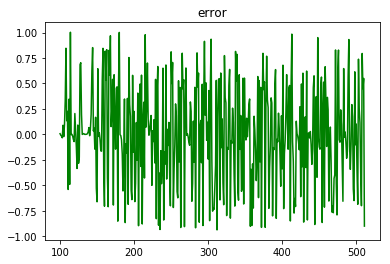

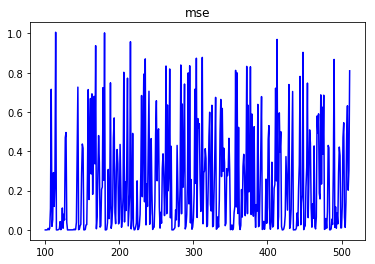

mae: 0.39561267842643 
 mse: 0.23751451365323 
 res: 8004.180597727


In [5]:

for i in range(lenght):
        print(i,coor_emb[i,0],coor_emb[i,1])
    
for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1])
    
    np_m_dist=np.asarray(m_dist.tolist())

    ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
    dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
    print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)

x_timeser_r2=x_timeser_r.copy()

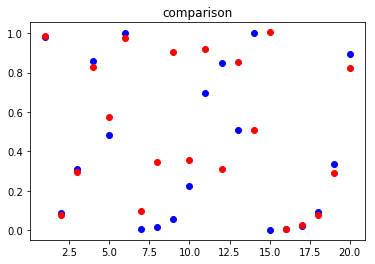

In [6]:
t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_timeser_r[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()

0.32590327486096 0.87876132118345 0.42615944630146
indmin 12 dist0 0.076447945367459
lyap 0.069322137267547 1.0492235810212
dist 0.080210987000154
b -1.8323019141939 c 0.83844836129627
delta 0.059471502197901
new value 0.94588670819592
new coor 100 0.87876132118345 0.42615944630146
0.87876132118345 0.42615944630146 0.94588670819592
indmin 88 dist0 0.028216248196259
lyap 0.069322137267547 1.0492235810212
dist 0.02960515297546
b -0.21508452304013 c 0.01147568301424
delta 0.018937264703239
new value 0.11701089387168
new coor 101 0.42615944630146 0.94588670819592
0.42615944630146 0.94588670819592 0.11701089387168
indmin 89 dist0 0.02960515297546
lyap 0.069322137267547 1.0492235810212
dist 0.031062424621591
b -0.76781538805772 c 0.14721019919945
delta 0.026451339104256
new value 0.39713336358099
new coor 102 0.94588670819592 0.11701089387168
0.94588670819592 0.11701089387168 0.39713336358099
indmin 90 dist0 0.031062424621593
lyap 0.069322137267547 1.0492235810212
dist 0.032591428396667
b -1

lyap 0.069322137267547 1.0492235810212
dist 0.031551951296452
b -1.2000961773384 c 0.35971341983033
delta 0.037110046362596
new value 0.61860311185052
new coor 129 0.31022868199215 0.85549607654587
0.31022868199215 0.85549607654587 0.61860311185052
indmin 112 dist0 0.031551951296457
lyap 0.069322137267547 1.0492235810212
dist 0.033105051327474
b -1.9645208654556 c 0.96427746996073
delta 0.047247761506841
new value 1.0058843134812
new coor 130 0.85549607654587 0.61860311185052
0.85549607654587 0.61860311185052 1.0058843134812
indmin 113 dist0 0.033105051327483
lyap 0.069322137267547 1.0492235810212
dist 0.034734600503711
b -0.24365864108859 c 0.014538267499242
delta 0.034877835084309
new value 0.13926823808645
new coor 131 0.61860311185052 1.0058843134812
0.61860311185052 1.0058843134812 0.13926823808645
indmin 114 dist0 0.034734600503711
lyap 0.069322137267547 1.0492235810212
dist 0.036444361925843
b -0.77476869919513 c 0.14960064638384
delta 0.043173507121283
new value 0.4089711031582

lyap 0.069322137267547 1.0492235810212
dist 0.068733783071189
b -0.48377222304614 c 0.057705157215531
delta 0.056700396196851
new value 0.2702363096215
new coor 159 0.35950672531146 1.0221873513469
0.35950672531146 1.0221873513469 0.2702363096215
indmin 132 dist0 0.068733783071189
lyap 0.069322137267547 1.0492235810212
dist 0.072117106011083
b -1.3630725595688 c 0.46156843194246
delta 0.10813452214539
new value 0.7356035408571
new coor 160 1.0221873513469 0.2702363096215
1.0221873513469 0.2702363096215 0.7356035408571
indmin 148 dist0 0.034696421191127
lyap 0.069322137267547 1.0492235810212
dist 0.036404303290772
b -1.9597933966294 c 0.9597784214158
delta 0.040944740918741
new value 1.0003690687741
new coor 161 0.2702363096215 0.7356035408571
0.2702363096215 0.7356035408571 1.0003690687741
indmin 149 dist0 0.036404303290773
lyap 0.069322137267547 1.0492235810212
dist 0.038196253463325
b -0.75916580549076 c 0.14393620595607
delta 0.024246575060315
new value 0.39170619027554
new coor 162

lyap 0.069322137267547 1.0492235810212
dist 0.13978414646844
b -0.72120425306359 c 0.12327248032275
delta 0.16445562728594
new value 0.44282994017476
new coor 189 0.51067019132072 1.1802786820279
0.51067019132072 1.1802786820279 0.44282994017476
indmin 177 dist0 0.13978414646844
lyap 0.069322137267547 1.0492235810212
dist 0.1466648227276
b -1.6395411663679 c 0.66370214394578
delta 0.18244632205674
new value 0.91099374421235
new coor 190 1.1802786820279 0.44282994017476
1.1802786820279 0.44282994017476 0.91099374421235
indmin 178 dist0 0.1466648227276
lyap 0.069322137267547 1.0492235810212
dist 0.15388419051208
b -2.1828298013197 c 1.1825892197373
delta 0.18544288225809
new value 1.1841363417889
new coor 191 0.44282994017476 0.91099374421235
0.44282994017476 0.91099374421235 1.1841363417889
indmin 179 dist0 0.15388419051208
lyap 0.069322137267547 1.0492235810212
dist 0.16145892143163
b -0.98908732978468 c 0.23542338392834
delta 0.19131181413399
new value 0.59019957195933
new coor 192 0.

lyap 0.069322137267547 1.0492235810212
dist 0.11656322557787
b -2.3605573640558 c 1.3908447352466
delta 0.094085748187124
new value 1.2273215561215
new coor 219 0.35961184337316 0.60439961797817
0.35961184337316 0.60439961797817 1.2273215561215
indmin 186 dist0 0.11656322557787
lyap 0.069322137267547 1.0492235810212
dist 0.12230088495619
b -0.88565988034953 c 0.19213908687864
delta 0.1258454454726
new value 0.50575266291106
new coor 220 0.60439961797817 1.2273215561215
0.60439961797817 1.2273215561215 0.50575266291106
indmin 197 dist0 0.069623679938671
lyap 0.069322137267547 1.0492235810212
dist 0.073050806789122
b -2.0913527588407 c 1.0923788898602
delta 0.065121444008827
new value 1.0782371014248
new coor 221 1.2273215561215 0.50575266291106
1.2273215561215 0.50575266291106 1.0782371014248
indmin 212 dist0 0.070388352077331
lyap 0.069322137267547 1.0492235810212
dist 0.073853118828755
b -1.4719211675708 c 0.53828624179312
delta 0.11578841207347
new value 0.79385478982213
new coor 222

lyap 0.069322137267547 1.0492235810212
dist 0.017046184942024
b -2.9312655011268 c 2.1480054580304
delta 0.017193195583084
new value 1.4742293483549
new coor 249 1.4751283605394 0.83383614971179
1.4751283605394 0.83383614971179 1.4742293483549
indmin 229 dist0 0.017046184942066
lyap 0.069322137267547 1.0492235810212
dist 0.017885259207663
b -1.4815531575628 c 0.54857280624769
delta 0.026618296218169
new value 0.75408572689049
new coor 250 0.83383614971179 1.4742293483549
0.83383614971179 1.4742293483549 0.75408572689049
indmin 230 dist0 0.017885259207669
lyap 0.069322137267547 1.0492235810212
dist 0.018765635713362
b -2.5664409215611 c 1.6465536367991
delta 0.020111108049828
new value 1.2932760148055
new coor 251 1.4742293483549 0.75408572689049
1.4742293483549 0.75408572689049 1.2932760148055
indmin 231 dist0 0.018765635713374
lyap 0.069322137267547 1.0492235810212
dist 0.019689347503325
b -1.4864884131346 c 0.55230252778091
delta 0.02092107214929
new value 0.75370474264196
new coor 2

lyap 0.069322137267547 1.0492235810212
dist 0.018453855798663
b -1.508171453781 c 0.56853713034481
delta 0.020799341830666
new value 0.76448539780582
new coor 279 0.83932045251172 1.488453063112
0.83932045251172 1.488453063112 0.76448539780582
indmin 248 dist0 0.018453855798668
lyap 0.069322137267547 1.0492235810212
dist 0.019362220664727
b -2.586552029611 c 1.6724984220987
delta 0.016053457251879
new value 1.3013027434314
new coor 280 1.488453063112 0.76448539780582
1.488453063112 0.76448539780582 1.3013027434314
indmin 249 dist0 0.019362220664769
lyap 0.069322137267547 1.0492235810212
dist 0.020315298502411
b -1.5074094852839 c 0.56783070925532
delta 0.030992245847001
new value 0.76920086556546
new coor 281 0.76448539780582 1.3013027434314
0.76448539780582 1.3013027434314 0.76920086556546
indmin 250 dist0 0.020315298502408
lyap 0.069322137267547 1.0492235810212
dist 0.02131529024421
b -2.5529750084927 c 1.629270565097
delta 0.024477205731108
new value 1.2887261071119
new coor 282 1.3

lyap 0.069322137267547 1.0492235810212
dist 0.020865356164197
b -2.6394224376745 c 1.7414866354899
delta 0.024581752175456
new value 1.332002094925
new coor 309 1.5111933678945 0.79147294650186
1.5111933678945 0.79147294650186 1.332002094925
indmin 267 dist0 0.020865356164178
lyap 0.069322137267547 1.0492235810212
dist 0.021892423713861
b -1.5628141537714 c 0.61038017399642
delta 0.029451370806701
new value 0.79613276228903
new coor 310 0.79147294650186 1.332002094925
0.79147294650186 1.332002094925 0.79613276228903
indmin 268 dist0 0.021892423713866
lyap 0.069322137267547 1.0492235810212
dist 0.022970047206295
b -2.6143136254006 c 1.7084992213658
delta 0.025275412800379
new value 1.3197945191005
new coor 311 1.332002094925 0.79613276228903
1.332002094925 0.79613276228903 1.3197945191005
indmin 269 dist0 0.022970047206302
lyap 0.069322137267547 1.0492235810212
dist 0.024100715186021
b -1.2975088528314 c 0.42067801875517
delta 0.028585803387115
new value 0.66304732810928
new coor 312 0.

lyap 0.069322137267547 1.0492235810212
dist 0.011991934458871
b -1.7342287686625 c 0.75186367978166
delta 0.0097315430441772
new value 0.87198015585334
new coor 339 1.1919106831267 1.5158515068251
1.1919106831267 1.5158515068251 0.87198015585334
indmin 293 dist0 0.010275929162069
lyap 0.069322137267547 1.0492235810212
dist 0.010781747193745
b -3.0500254191763 c 2.3256273858781
delta 0.012062922918368
new value 1.5310441710473
new coor 340 1.5158515068251 0.87198015585334
1.5158515068251 0.87198015585334 1.5310441710473
indmin 294 dist0 0.010781747193866
lyap 0.069322137267547 1.0492235810212
dist 0.011312463400413
b -1.6142292257801 c 0.65139291927655
delta 0.012818590262327
new value 0.8135239080212
new coor 341 0.87198015585334 1.5310441710473
0.87198015585334 1.5310441710473 0.8135239080212
indmin 295 dist0 0.011312463400405
lyap 0.069322137267547 1.0492235810212
dist 0.011869303359144
b -2.6923655040182 c 1.812144579036
delta 0.015927682922293
new value 1.3541465934702
new coor 342

lyap 0.069322137267547 1.0492235810212
dist 0.0073280839943669
b -1.2130750170902 c 0.36786093143673
delta 0.01035718791049
new value 0.61171610250033
new coor 369 0.69171205216941 1.318503450418
0.69171205216941 1.318503450418 0.61171610250033
indmin 345 dist0 0.0073280839943695
lyap 0.069322137267547 1.0492235810212
dist 0.0076887985305962
b -2.39034528434 c 1.428423189467
delta 0.007603979117969
new value 1.198974631729
new coor 370 1.318503450418 0.61171610250033
1.318503450418 0.61171610250033 1.198974631729
indmin 291 dist0 0.0044518476033331
lyap 0.069322137267547 1.0492235810212
dist 0.0046709834845296
b -3.0425387523782 c 2.3142585141692
delta 0.0028289655588843
new value 1.5226838589685
new coor 371 0.61171610250033 1.198974631729
0.61171610250033 1.198974631729 1.5226838589685
indmin 292 dist0 0.0046709834842146
lyap 0.069322137267547 1.0492235810212
dist 0.0049009060181983
b -1.7581749853608 c 0.77277676874626
delta 0.0084973033092818
new value 0.88333614433506
new coor 372

lyap 0.069322137267547 1.0492235810212
dist 0.0024465039584334
b -2.697528251756 c 1.8191636163554
delta 0.002050268252515
new value 1.3497892600042
new coor 399 1.3564559924057 0.81972008593162
1.3564559924057 0.81972008593162 1.3497892600042
indmin 386 dist0 0.0024465039582827
lyap 0.069322137267547 1.0492235810212
dist 0.0025669296440917
b -1.3800458634978 c 0.47612776730873
delta 0.0039390509608524
new value 0.69199245722933
new coor 400 0.81972008593162 1.3497892600042
0.81972008593162 1.3497892600042 0.69199245722933
indmin 387 dist0 0.0025669296440703
lyap 0.069322137267547 1.0492235810212
dist 0.0026932831133808
b -2.6389672848542 c 1.7410347587893
delta 0.0030488314698417
new value 1.321008058162
new coor 401 1.3497892600042 0.69199245722933
1.3497892600042 0.69199245722933 1.321008058162
indmin 366 dist0 0.0025213560154119
lyap 0.069322137267547 1.0492235810212
dist 0.0026454661875197
b -1.2234322050007 c 0.3741959432538
delta 0.0016084830123587
new value 0.61252034400651
new

lyap 0.069322137267547 1.0492235810212
dist 0.0059988629558705
b -1.6423833199087 c 0.67434253529424
delta 0.0072683104974715
new value 0.8248258152031
new coor 429 0.89430355262584 1.5382391973578
0.89430355262584 1.5382391973578 0.8248258152031
indmin 416 dist0 0.005998862955839
lyap 0.069322137267547 1.0492235810212
dist 0.0062941484725805
b -2.7211940306757 c 1.8512122921706
delta 0.0069125901514447
new value 1.3640533104136
new coor 430 1.5382391973578 0.8248258152031
1.5382391973578 0.8248258152031 1.3640533104136
indmin 417 dist0 0.0062941484726369
lyap 0.069322137267547 1.0492235810212
dist 0.0066039689999389
b -1.6545534800215 c 0.6843683452163
delta 0.0085928683289234
new value 0.83157317417522
new coor 431 0.8248258152031 1.3640533104136
0.8248258152031 1.3640533104136 0.83157317417522
indmin 418 dist0 0.0066039689999217
lyap 0.069322137267547 1.0492235810212
dist 0.0069290400030505
b -2.7076511704949 c 1.8328261089974
delta 0.0083919659637671
new value 1.3580215682293
new c

lyap 0.069322137267547 1.0492235810212
dist 0.025357721108162
b -3.0884173849373 c 2.3843452100946
delta 0.030677405434821
new value 1.559547395186
new coor 459 0.64424410888627 1.236245159099
0.64424410888627 1.236245159099 1.559547395186
indmin 446 dist0 0.025357721108214
lyap 0.069322137267547 1.0492235810212
dist 0.026605918947696
b -1.8190310817791 c 0.82696210432855
delta 0.032025913950463
new value 0.9255284978648
new coor 460 1.236245159099 1.559547395186
1.236245159099 1.559547395186 0.9255284978648
indmin 447 dist0 0.0266059189477
lyap 0.069322137267547 1.0492235810212
dist 0.027915557554664
b -3.1076786657444 c 2.4141290846193
delta 0.033916825408133
new value 1.5707977455763
new coor 461 1.559547395186 0.9255284978648
1.559547395186 0.9255284978648 1.5707977455763
indmin 448 dist0 0.027915557554618
lyap 0.069322137267547 1.0492235810212
dist 0.029289661263658
b -1.6830025438776 c 0.70781050897019
delta 0.035433413857967
new value 0.85921797886777
new coor 462 0.925528497864

lyap 0.069322137267547 1.0492235810212
dist 0.068113401887172
b -2.7129119848114 c 1.8374447167909
delta 0.10056127569641
new value 1.4067366302539
new coor 489 1.4851167426547 0.82729048812815
1.4851167426547 0.82729048812815 1.4067366302539
indmin 229 dist0 0.062946767974625
lyap 0.069322137267547 1.0492235810212
dist 0.066045233308044
b -1.4815531575628 c 0.54785978855814
delta 0.059670800662792
new value 0.7706119791128
new coor 490 0.82729048812815 1.4067366302539
0.82729048812815 1.4067366302539 0.7706119791128
indmin 464 dist0 0.051394483041439
lyap 0.069322137267547 1.0492235810212
dist 0.05392430354147
b -2.7439719914276 c 1.880320785845
delta 0.089995257427655
new value 1.4169836244276
new coor 491 1.4067366302539 0.7706119791128
1.4067366302539 0.7706119791128 1.4169836244276
indmin 476 dist0 0.027832050576691
lyap 0.069322137267547 1.0492235810212
dist 0.029202043773237
b -1.4161196853378 c 0.50060815052963
delta 0.054427576491328
new value 0.73527363091457
new coor 492 0.7

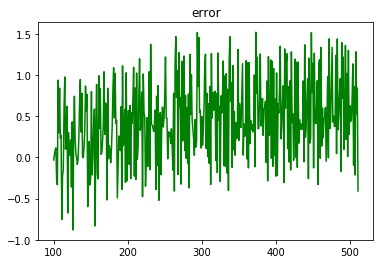

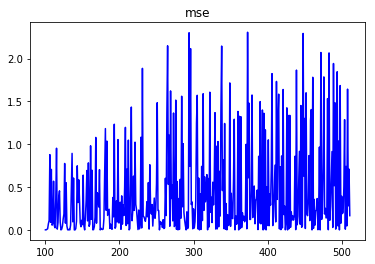

mae: 0.54371135215549 
 mse: 0.45216772482027 
 res: 8495.2261716475


In [7]:
D=3

x_timeser=x_timeser_o.copy()
x_timeser_r=x_timeser_o.copy()

coor_emb=matrix(lenght-D+1+n_new,D) #embedding na dimensão D

for i in range (lenght-D+1):
    for j in range (D):
        coor_emb[i,j]=x_timeser[i+j,0] #pegando as coordenadas no espaço de dimensão D

for l in range(lenght,lenght+n_new):
    
    m_dist=matrix(l-D,1) #guardar distâncias entre o último vetor e todos os outros.
    
    v2=matrix(1,D)
    v1=matrix(1,D)
    
    for i in range(D):
        v2[0,i]=coor_emb[l-D,i]
        
    for i in range (l-D):
        for j in range(D):
            v1[0,j]=coor_emb[i,j]
        m_dist[i,0]=mpf(distanc(v2,v1))
        
 
    print(coor_emb[l-D,0],coor_emb[l-D,1],coor_emb[l-D,2])
    
    np_m_dist=np.asarray(m_dist.tolist())

    ind_min=np.argmin(np_m_dist) #acha qual vetor está mais próximo do último
    dist_0=m_dist[ind_min,0] #dá distância do vetor mais próximo ao último
    
    print('indmin',ind_min,'dist0',dist_0)
    
    lyap=lyapunov(x0,r)
    k=1
    dist_1=dist_0*mpf(2**mpf(k*lyap))
    dist_1=mpf(dist_1)
    
    print('lyap',lyap,2**mpf(k*lyap))#calcula distância que deve existir enre o vetor ind_min+1 e l-(D+1)+1
    
    print('dist',dist_1)
    
    #bhaskara
    b=mpf(-2*coor_emb[ind_min+1,D-1])
    c_aux=0
    for i in range (D-1):
        c_aux=c_aux+mpf(mpf(coor_emb[ind_min+1,i]-coor_emb[l-D,i+1])**2)
        c_aux=mpf(c_aux)
        
    c=mpf(coor_emb[ind_min+1,D-1]**2) -mpf(dist_1**2) +c_aux
    c=mpf(c)
    
    
    for i in range(D-1):
        coor_emb[l-D+1,i]=coor_emb[l-D,i+1] #pelo método, é fácil ver que as primeiras coordenadas do novo vetor são essas
    
    print('b',b,'c',c)
    delta=mpf(b**2)-mpf(4*c)
    if delta<0: #não exise, mas pode acontecer por erro de arredondamento
        delta=0
    else:
        delta=mpmath.sqrt(mpf(b**2)-mpf(4*c))
    coor_emb[l-D+1,D-1]=mpf(mpf((-b+delta))/2) #novo valor (último) do vetor calculado
    print('delta',delta)
    print('new value',coor_emb[l-D+1,D-1]) #novo vetor 
    
    print('new coor',l,coor_emb[l-D+1,0],coor_emb[l-D+1,1])
    
    #print(np.linalg.norm(coor_emb[l-D+1]-coor_emb[ind_min+1]),dist_1)

    x_timeser_r[l,0]=coor_emb[l-D+1,D-1]


error=x_timeser_r-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]


mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]

t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()




print('mae:',mae,'\n mse:',mse,'\n res:',res)

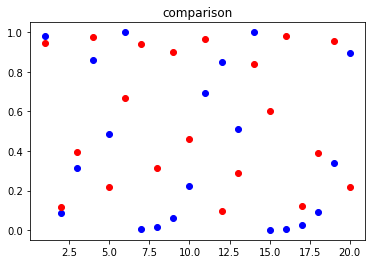

In [8]:
#print(sum(mae_f),mae_f.shape[0])
#print(mae_f,abs(mae_f))

t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_timeser_r[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()



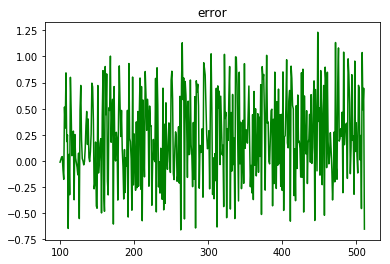

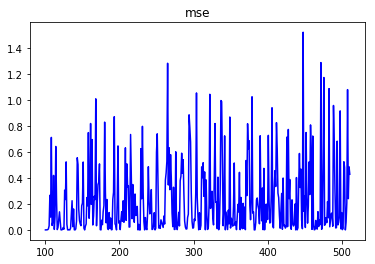

mae: 0.39161721565719 
 mse: 0.23218254852685 
 res: 8193.3856277685


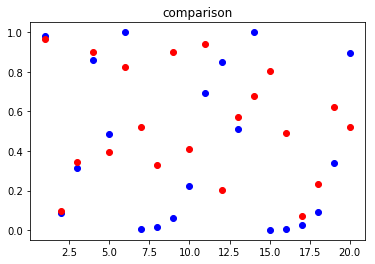

0.069322137267547


In [9]:
x_multdim=(x_timeser_r+x_timeser_r2)/2

#for i in range (x_multdim.shape[0]): print(i,x_multdim[i],x_timeser_r[i],x_timeser_r2[i])
    
error=x_multdim-x_timeser
mse_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    mse_f[i,0]=error[i,0]**2
mae_f=error.copy()
for i in range (error.rows):
    if error[i,0]<0:
        mae_f[i,0]=-error[i,0]
res_f=matrix(lenght+n_new,1)
for i in range (error.rows):
    res_f[i,0]=error[i,0]/x_timeser[i,0]

mae=mpmath.norm(mae_f,1)/n_new
mse=mpmath.norm(mse_f,1)/n_new
res=mpmath.norm(res_f,1)

mae_f=np.asarray(mae_f.tolist())[lenght:]
mse_f=np.asarray(mse_f.tolist())[lenght:]
res_f=np.asarray(res_f.tolist())[lenght:]
error=np.asarray(error.tolist())[lenght:]


t=np.arange(lenght,lenght+n_new,1)

plt.plot(t,error,'g')
plt.title('error')
plt.show()

plt.plot(t,mse_f,'b')
plt.title('mse')
plt.show()

print('mae:',mae,'\n mse:',mse,'\n res:',res)

t=np.arange(1,21,1)


plt.plot(t,x_timeser[lenght:lenght+20],'bo',t,x_multdim[lenght:lenght+20],'ro')
plt.title('comparison')
plt.show()

lyap=lyapunov(x0,r)
print(lyap)
